In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


%matplotlib inline  

import time

In [2]:
def load_image(filename, size = 256):
    return Image.open(filename).convert('L').resize((size, size), Image.ANTIALIAS)

def conv2d(img, convolution):
    img_array = np.array(img, dtype = np.int64)
    result = np.zeros_like(img_array, dtype = np.int64)
    
    k0 = convolution.shape[0]//2
    k1 = convolution.shape[1]//2
    for i in range(k0, img_array.shape[0] - k0):
        for j in range(k1, img_array.shape[1] - k1):
            for t0 in range(-k0, k0 + 1, 1):
                for t1 in range(-k1, k1 + 1, 1):
                    result[i,j] += img_array[i + t0, j + t1]*convolution[k0 - t0, k1 - t1]
                    
    result[np.where(result > 255)] = 255
    result[np.where(result < 0)] = 0
    return Image.fromarray(np.array(result, dtype = np.uint8))

In [3]:
img = load_image('image/6.jpg')

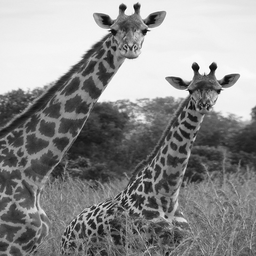

In [4]:
img

# Тождественное преобразование

In [5]:
convolution = np.eye(3)
convolution[0,0] = 0
convolution[2,2] = 0
convolution

array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.]])

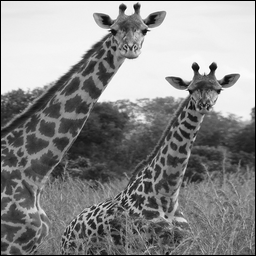

In [6]:
new_img = conv2d(img, convolution)
new_img

# Свертка Собеля

In [7]:
convolution = np.eye(3)*0
convolution[:,0] += -1
convolution[:,2] += 1
convolution[1,0] = -2
convolution[1,2] = 2
convolution

array([[-1.,  0.,  1.],
       [-2.,  0.,  2.],
       [-1.,  0.,  1.]])

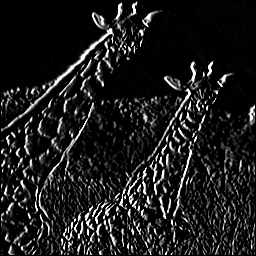

In [8]:
new_img = conv2d(img, convolution)
new_img

# Вычитаения сглаженого от исходного

In [9]:
convolution = np.ones([3,3])/9.
convolution

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [10]:
new_img = conv2d(img, convolution)

In [11]:
res = 4*(np.array(img, dtype=np.int64) - np.array(new_img, dtype=np.int64))

res[np.where(res > 255)] = 255
res[np.where(res < 0)] = 0

res = np.array(res, dtype=np.uint8)
new_img_1 = Image.fromarray(res)

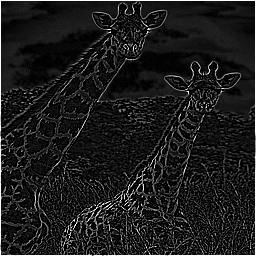

In [12]:
new_img_1